In [1]:
import torch
from torch import nn
import math


In [2]:
from d2l_common import MultiHeadAttention

num_hiddens, num_heads = 100, 5
attention = MultiHeadAttention(num_hiddens, num_heads, 0.5)
batch_size, num_queries, valid_lens = 2, 4, torch.tensor([3, 2])
X = torch.ones((batch_size, num_queries, num_hiddens))

attn = attention(X,X,X,valid_lens)
attn.shape

/Users/tangyun/opt/miniconda3/envs/rl/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([2, 4, 100])

1. cnn computation cost:  $O(knd^2)$
2. rnn computation cost $O(nd^2)$
3. self attention computation cost: $O(n^2d)$

In [7]:
torch.pow(10000, torch.arange(0, 100, 2).type(torch.float32) / 100)

tensor([1.0000e+00, 1.2023e+00, 1.4454e+00, 1.7378e+00, 2.0893e+00, 2.5119e+00,
        3.0200e+00, 3.6308e+00, 4.3652e+00, 5.2481e+00, 6.3096e+00, 7.5858e+00,
        9.1201e+00, 1.0965e+01, 1.3183e+01, 1.5849e+01, 1.9055e+01, 2.2909e+01,
        2.7542e+01, 3.3113e+01, 3.9811e+01, 4.7863e+01, 5.7544e+01, 6.9183e+01,
        8.3176e+01, 1.0000e+02, 1.2023e+02, 1.4454e+02, 1.7378e+02, 2.0893e+02,
        2.5119e+02, 3.0200e+02, 3.6308e+02, 4.3652e+02, 5.2481e+02, 6.3096e+02,
        7.5858e+02, 9.1201e+02, 1.0965e+03, 1.3183e+03, 1.5849e+03, 1.9055e+03,
        2.2909e+03, 2.7542e+03, 3.3113e+03, 3.9811e+03, 4.7863e+03, 5.7544e+03,
        6.9183e+03, 8.3176e+03])

In [13]:
(torch.arange(1000).reshape(-1,1) / torch.pow(10000, torch.arange(0, 100, 2).type(torch.float32) / 100)).shape

torch.Size([1000, 50])

In [14]:
class PositionEncoding(nn.Module):
    def __init__(self, num_hiddens, dropout, max_len=1000):
        super().__init__()
        self.dropout = nn.Dropout(dropout)
        self.P = torch.zeros(1, max_len, num_hiddens)
        X = torch.arange(max_len, dtype=torch.float32).reshape(-1, 1) / \
            torch.pow(10000, torch.arange(0, num_hiddens, 2, dtype=torch.float32) / num_hiddens)
        self.P[:, :, 0::2] = torch.sin(X)
        self.P[:, :, 1::2] = torch.cos(X)
        
    def forward(self, X):
        X = X + self.P[:, :X.shape[1], :].to(X.device)
        return self.dropout(X)

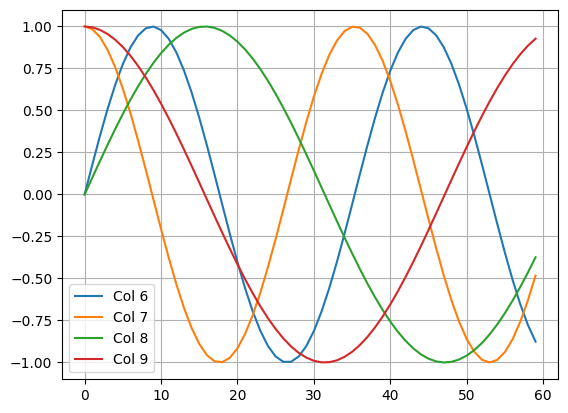

In [28]:
import matplotlib.pyplot as plt

encoding_dim, num_steps = 32, 60
pos_encoding = PositionEncoding(encoding_dim, 0)
X = pos_encoding(torch.zeros(1,num_steps, encoding_dim))
P = pos_encoding.P[:,:X.shape[1],:]
P.shape
P[0,:,6:10].shape
plt.plot(torch.arange(num_steps), P[0,:,6:10])
plt.grid()
plt.legend(["Col %d" % d for d in range(6, 10)])
plt.show()

In [23]:
for i in range(8):
    print(f'{i} in binary is {i:>03b}')

0 in binary is 000
1 in binary is 001
2 in binary is 010
3 in binary is 011
4 in binary is 100
5 in binary is 101
6 in binary is 110
7 in binary is 111


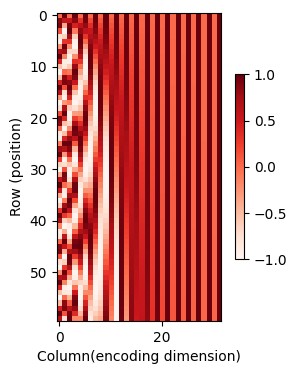

In [35]:
from d2l_common import show_heatmaps

P[0,:,6:10].shape
PP = P[0, :, :].unsqueeze(0).unsqueeze(0)
PP.shape

show_heatmaps(PP,xlabel='Column(encoding dimension)',ylabel='Row (position)',figsize=(3.5,4))